In [3]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Визуализация и анализ фрагментов файлов в том виде, в котором изначально они были получены. 
Рассматриваем файлы за 21 марта 2021 г. 
В файле 2021-03-21-imp.csv соедержится порядка 120 миллионов строк, в файле 2021-03-21-clc.csv - порядка 1,5 миллионов строк.

In [4]:
# Загрузка фрагмента файла, содержащего информацию по кликам за сутки
impressions_df = pd.read_csv('2021-03-21-imp.csv', nrows=8000)
impressions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              8000 non-null   object 
 1   dateTime          8000 non-null   object 
 2   campaign          8000 non-null   int64  
 3   campaignType      8000 non-null   int64  
 4   spot              8000 non-null   int64  
 5   banner            8000 non-null   int64  
 6   bannerSize        8000 non-null   object 
 7   uid               8000 non-null   object 
 8   language          7916 non-null   object 
 9   ip                8000 non-null   object 
 10  country           8000 non-null   object 
 11  city              7497 non-null   object 
 12  browser           8000 non-null   object 
 13  browserVersion    7999 non-null   float64
 14  os                8000 non-null   object 
 15  osVersion         8000 non-null   int64  
 16  deviceType        8000 non-null   object 


In [7]:
# Загрузка фрагмента файла, содержащего информацию по показам за сутки
clicks_df = pd.read_csv('2021-03-21-clc.csv', nrows=6000)
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              6000 non-null   object 
 1   dateTime          6000 non-null   object 
 2   campaign          6000 non-null   int64  
 3   campaignType      6000 non-null   int64  
 4   spot              6000 non-null   int64  
 5   banner            6000 non-null   int64  
 6   bannerSize        34 non-null     object 
 7   uid               6000 non-null   object 
 8   language          5996 non-null   object 
 9   ip                6000 non-null   object 
 10  country           5991 non-null   object 
 11  city              5577 non-null   object 
 12  browser           6000 non-null   object 
 13  browserVersion    5998 non-null   float64
 14  os                6000 non-null   object 
 15  osVersion         5944 non-null   object 
 16  deviceType        6000 non-null   object 


In [8]:
# Число уникальных элементов в каждой колонке
for column in impressions_df:
    print(column, ':', impressions_df[column].nunique())

date : 1
dateTime : 7561
campaign : 1
campaignType : 1
spot : 1
banner : 5
bannerSize : 1
uid : 7841
language : 21
ip : 5705
country : 12
city : 221
browser : 17
browserVersion : 48
os : 2
osVersion : 11
deviceType : 1
deviceModel : 155
deviceBrand : 16
trafficSource : 1
affiliateNetwork : 1
offer : 1
path : 3
ua : 1625
connType : 4
proxyType : 3
isp : 84
impressions : 3
costs : 3


In [9]:
# Число уникальных элементов в каждой колонке
for column in clicks_df:
    print(column, ':', clicks_df[column].nunique())

date : 1
dateTime : 5735
campaign : 94
campaignType : 2
spot : 13
banner : 12
bannerSize : 4
uid : 4911
language : 48
ip : 4876
country : 122
city : 1402
browser : 31
browserVersion : 77
os : 10
osVersion : 19
deviceType : 6
deviceModel : 258
deviceBrand : 20
trafficSource : 6
affiliateNetwork : 1
offer : 17
path : 22
ua : 2013
connType : 4
proxyType : 3
action : 2
convType : 1
convPayout : 2
isp : 816
revenue : 3


In [10]:
# Уникальные значения в графе "spot"
clicks_df.spot.unique()

array([    0, 21881, 21882, 21883, 21884, 21889, 21890, 21893, 21904,
       21905, 21907, 21908, 21920], dtype=int64)

На основании количества уникальных значений для каждого из параметров можно сделать вывод, что для их кодирования лучше всего подойдет BinaryEncoder

### Анализ записей, набранных из всего масива имеющихся данных (файлы с импрессиями и кликами за период 15.05.2021 - 15.06.2021)

In [11]:
# Загрузка части набранных данных
impressions_1406 =  pd.read_csv("E:/Work/RTB/forGit/data/impressions_data_2021-06-14.csv")
click_1406 =  pd.read_csv("E:/Work/RTB/forGit/data/click_data_2021-06-14.csv")

In [12]:
# Вывод информации о данных по импрессиям за 14.06.2021
impressions_1406.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12915 entries, 0 to 12914
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dateTime        12915 non-null  object 
 1   campaign        12915 non-null  int64  
 2   campaignType    12915 non-null  int64  
 3   spot            12915 non-null  int64  
 4   banner          12915 non-null  int64  
 5   bannerSize      12915 non-null  object 
 6   uid             12915 non-null  object 
 7   language        12883 non-null  object 
 8   ip              12915 non-null  object 
 9   country         12905 non-null  object 
 10  city            11847 non-null  object 
 11  browser         12915 non-null  object 
 12  browserVersion  12892 non-null  float64
 13  os              12915 non-null  object 
 14  osVersion       12856 non-null  object 
 15  deviceType      12915 non-null  object 
 16  deviceModel     7645 non-null   object 
 17  deviceBrand     7645 non-null  

In [13]:
# Вывод информации о данных по "кликам" за 14.06.2021
click_1406.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dateTime         574 non-null    object 
 1   campaign_x       574 non-null    int64  
 2   campaignType_x   574 non-null    int64  
 3   spot             574 non-null    int64  
 4   banner           574 non-null    int64  
 5   bannerSize       574 non-null    object 
 6   uid              574 non-null    object 
 7   language         574 non-null    object 
 8   ip               574 non-null    object 
 9   country          574 non-null    object 
 10  city             534 non-null    object 
 11  browser          574 non-null    object 
 12  browserVersion   574 non-null    float64
 13  os               574 non-null    object 
 14  osVersion        570 non-null    object 
 15  deviceType       574 non-null    object 
 16  deviceModel      419 non-null    object 
 17  deviceBrand     

In [14]:
for column in impressions_1406:
    print(column, ':', impressions_1406[column].nunique())

dateTime : 11954
campaign : 409
campaignType : 1
spot : 409
banner : 152
bannerSize : 10
uid : 12904
language : 46
ip : 12827
country : 123
city : 2465
browser : 42
browserVersion : 91
os : 10
osVersion : 34
deviceType : 6
deviceModel : 367
deviceBrand : 24
trafficSource : 9
offer : 17
path : 186
ua : 3258
connType : 4
proxyType : 5


In [15]:
for column in click_1406:
    print(column, ':', click_1406[column].nunique())

dateTime : 334
campaign_x : 61
campaignType_x : 1
spot : 61
banner : 59
bannerSize : 6
uid : 330
language : 11
ip : 330
country : 26
city : 125
browser : 21
browserVersion : 53
os : 6
osVersion : 23
deviceType : 3
deviceModel : 81
deviceBrand : 14
trafficSource_x : 7
offer_x : 11
path_x : 63
ua : 271
connType : 3
proxyType : 3
campaign_y : 49
campaignType_y : 2
trafficSource_y : 10
offer_y : 17
path_y : 19
action : 1
convType : 0
convPayout : 1
revenue : 1


При исследовании полученных файлов было обнаружено, что записи, в которых имеется положительный доход, отсутствуют совсем в файлах с импрессиями. 
Программа, осуществляющая сбор данных, была дополнена таким образом, чтобы отдельно формировался массив данных с кликами, который не сравнивается с данными из файлов с импрессиями. 

In [89]:
# Загрузка файла с "кликами", в котором присутствуют пользователи 
# с ненулевым доходом 
rev_test =  pd.read_csv("E:/Work/RTB/forGit/data/revenue_2021-05-17.csv")

In [90]:
rev_test = rev_test.fillna(0)

Исследование корреляции в данных. На основании данного исследования делаем дополнительный вывод о том, какие данные можно исключить из рассмотрения при обучении. 

In [91]:
data_for_correlation_check = rev_test.drop(['dateTime', 'campaign', 'campaignType',
    'uid', 'ip', 'browserVersion', 'deviceModel', 'trafficSource', 'affiliateNetwork', 
    'action', 'convType'], axis=1)

In [85]:
data_for_correlation_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bannerSize  5110 non-null   object 
 1   language    5110 non-null   object 
 2   country     5110 non-null   object 
 3   city        5110 non-null   object 
 4   browser     5110 non-null   object 
 5   os          5110 non-null   object 
 6   deviceType  5110 non-null   object 
 7   offer       5110 non-null   object 
 8   path        5110 non-null   object 
 9   connType    5110 non-null   object 
 10  proxyType   5110 non-null   object 
 11  convType    5110 non-null   object 
 12  isp         5110 non-null   object 
 13  revenue     5110 non-null   float64
dtypes: float64(1), object(13)
memory usage: 559.0+ KB


In [92]:
from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_example():
    associations(data_for_correlation_check, nominal_columns=[ 'spot', 'banner', 'bannerSize',
       'language', 'country', 'city', 'browser',
       'os', 'osVersion', 'deviceType', 'deviceBrand',
       'offer', 'path', 'ua', 'connType',
       'proxyType', 'convPayout', 'isp', 'revenue'])

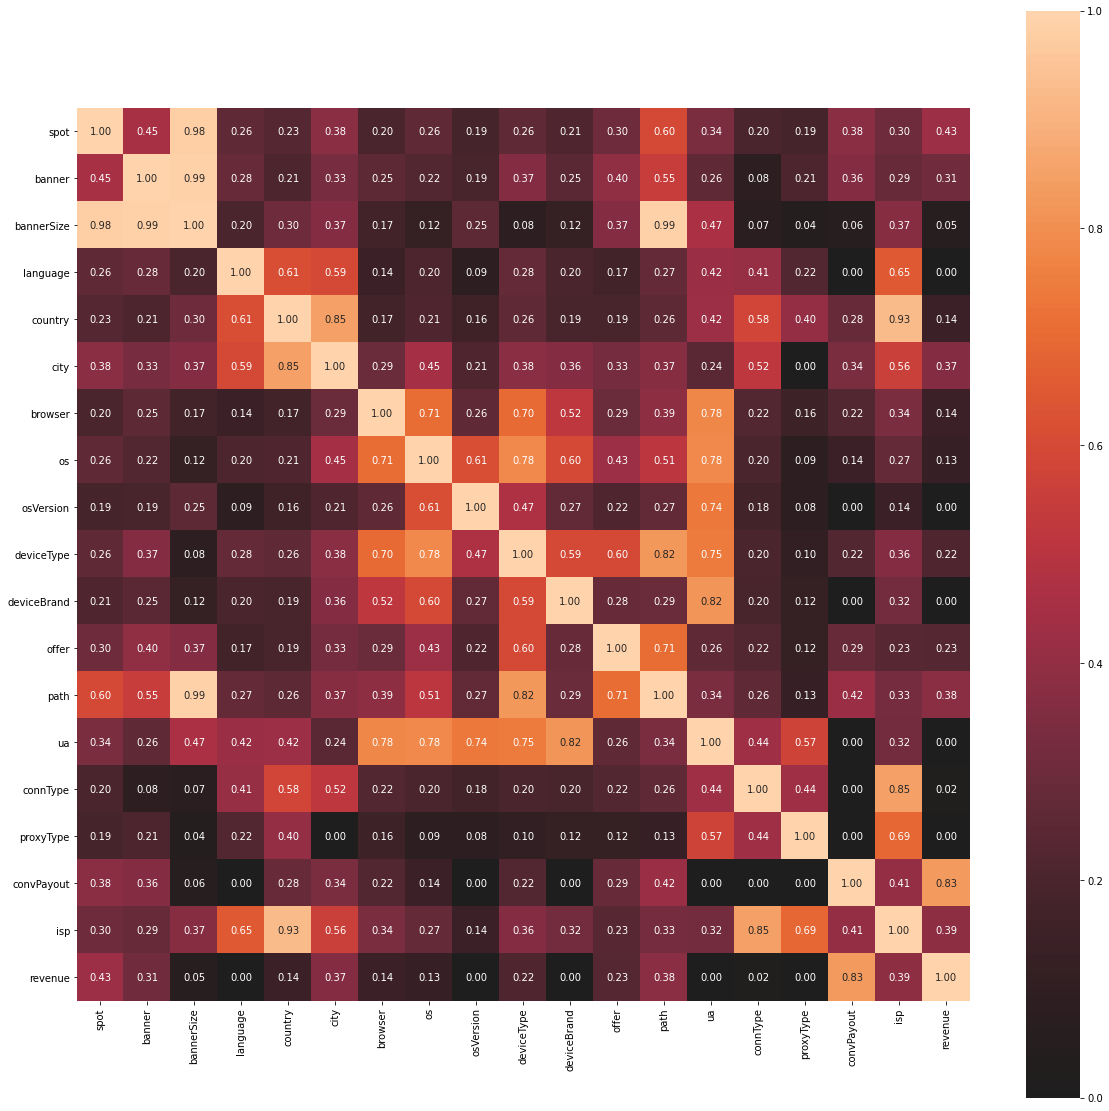

In [93]:
plt.rcParams["figure.figsize"]=20,20
associations_example()

Гистрограмма распределения величины дохода (нулевые значение не рассматриваются, а значение округляется)

<AxesSubplot:xlabel='revenue', ylabel='count'>

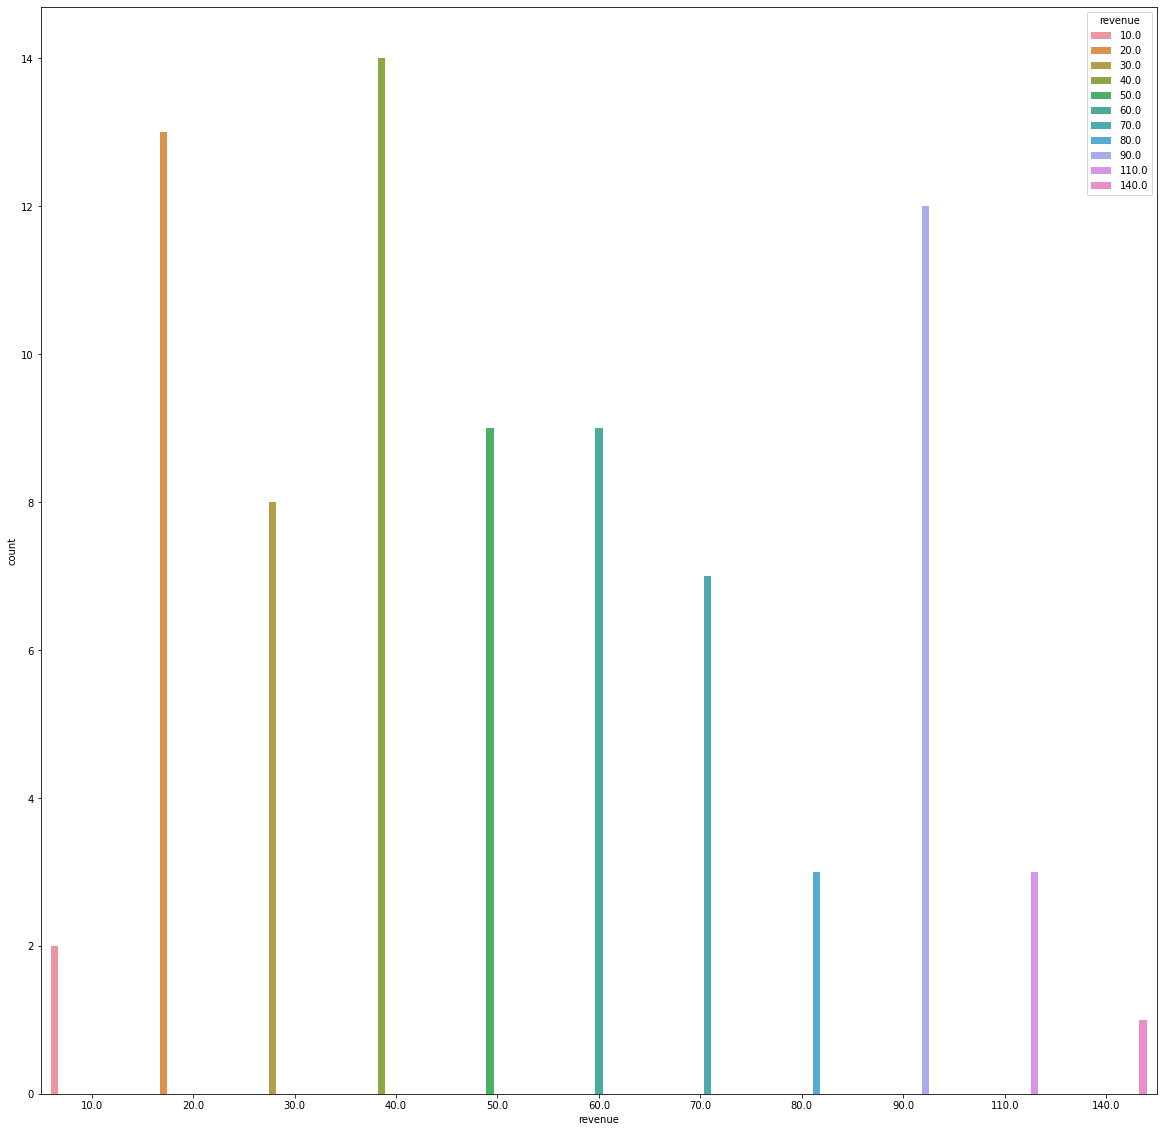

In [95]:
rev_test['revenue'] = round(rev_test['revenue'], -1)
click_revenue_1 = rev_test.loc[rev_test['revenue'] != 0]
sns.countplot(x = 'revenue', hue = "revenue", data = click_revenue_1)